# Uber Eats USA Restaurants and Menus

# Data Loading and Initial Exploring

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## data read and check

In [2]:
res = pd.read_csv("restaurants.csv")
menu = pd.read_csv("restaurant-menus.csv")

res.head(5)


,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [3]:
menu.head(5)

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [4]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


In [5]:
res = res.dropna(subset = ['price_range', 'category','zip_code', 'full_address'])   #移除價錢、分類和位置資訊有缺失值的店家，以免後續造成客戶分類時的影響

到此數據皆已成功匯入，且資料集重要缺失值處理完畢  

All data has been successfully imported, and the major missing values in the dataset have been handled.

# 🎯定義問題 Define the Problem to Analyze

因為這次主題是針對中型商家的資料分析，以及後續方案發想，所以我會先處理數據，將**中型餐廳**的數據獨立出來。  

Since this project focuses on mid-market businesses, I first filtered the dataset to isolate the data for **mid-sized restaurants**.

我決定使用**評價數**作為判斷該商家是否為**中型商家**的依據，雖然實務中仍要考慮更多面向，例如分店數、店家型態、營收等等，但因資料收集方向，故先以評價數為基本分類欄位。  
I decided to use the **number of reviews** as the criterion to identify **mid-sized businesses**.
Although, in practice, other factors such as the number of branches,business type or profits should also be considered, I will use review count as the basis for classification due to the limitations of the available data.



## 判斷分布型態 Determine the Distribution

In [6]:
res['ratings'].describe()

count    30573.000000
mean        77.919112
std         71.259567
min         10.000000
25%         26.000000
50%         55.000000
75%        105.000000
max        500.000000
Name: ratings, dtype: float64

### 📊直方圖 Histogram

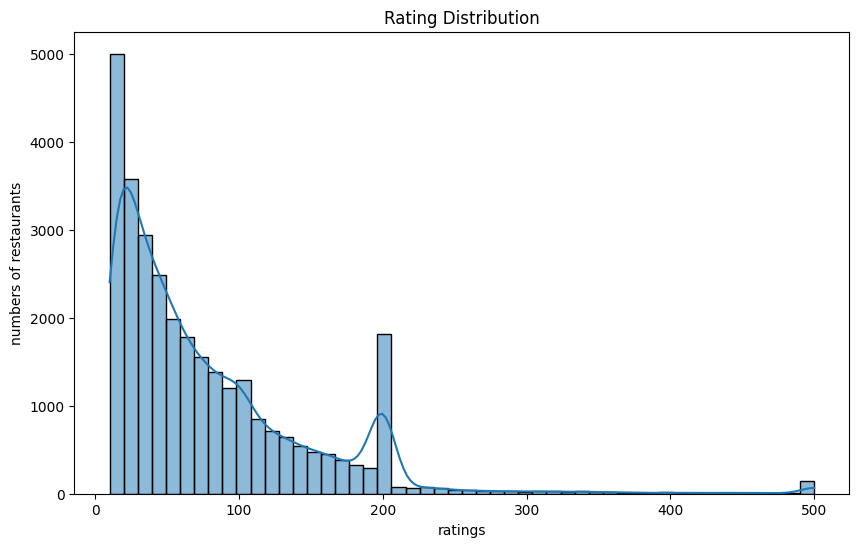

In [7]:
plt.figure(figsize = (10, 6))
sns.histplot(data = res, x = 'ratings', bins = 50, kde = True)
plt.title("Rating Distribution")
plt.xlabel('ratings')
plt.ylabel('numbers of restaurants')
plt.show()

### 發現異常值 Detect Outliers

雖然現實中有可能出現非符合典型分布的數據，但是在此評價數剛好是200個的遠高於其他評價數的，所以決定視為異常值剃除  
Although real-world data may not always follow a typical distribution, the review count of exactly 200 is significantly higher than the others in this dataset. Therefore, I decided to treat it as an outlier and remove it.

In [8]:
res['ratings'].value_counts().head(10)

ratings
200.0    1709
10.0      603
12.0      569
11.0      560
13.0      521
100.0     512
15.0      503
14.0      494
16.0      465
17.0      443
Name: count, dtype: int64

### Remove Outliers

In [9]:
res_remove200 = res[res['ratings'] != 200]

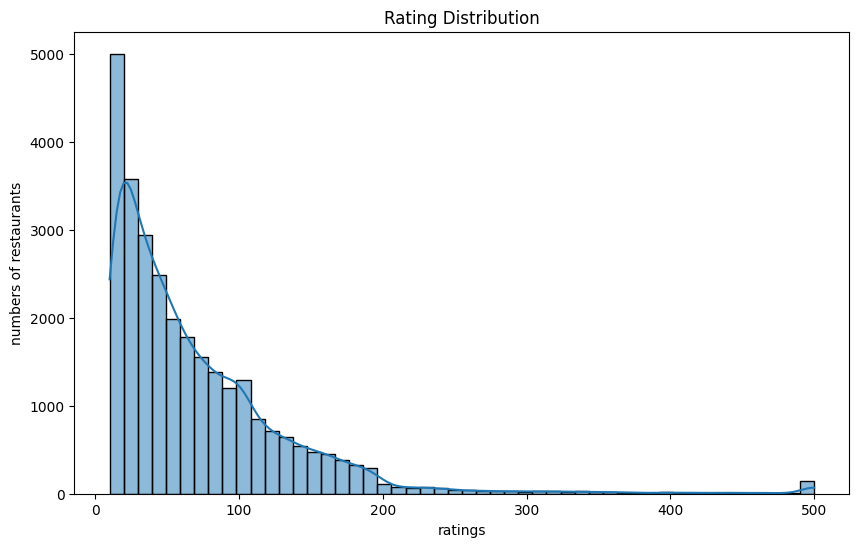

In [10]:
plt.figure(figsize = (10, 6))
sns.histplot(data = res_remove200, x = 'ratings', bins = 50, kde = True)
plt.title("Rating Distribution")
plt.xlabel('ratings')
plt.ylabel('numbers of restaurants')
plt.show()

清理完資料後，我決定將評價數落在第一到第三四分位數（Q1~Q3）之間的店家，定義為中型商家。
After cleaning the data, I decided to define mid-sized restaurants as those whose review counts fall between the first and third quartiles (Q1 to Q3).

In [11]:
mid_res = res_remove200['ratings'].quantile([0.25, 0.5, 0.75])
mid_res

0.25    25.0
0.50    51.0
0.75    96.0
Name: ratings, dtype: float64

## 中型商家定義結論 Conclusion of Mid-Sized Restaurant Definition

使用mid_res資料集作為中型商家分析的主體，中型商家為評價數24~92則之間的商家  
The mid_res dataset was used as the main dataset for mid-sized restaurant analysis.
Mid-sized restaurants are defined as those with review counts between 24 and 92.

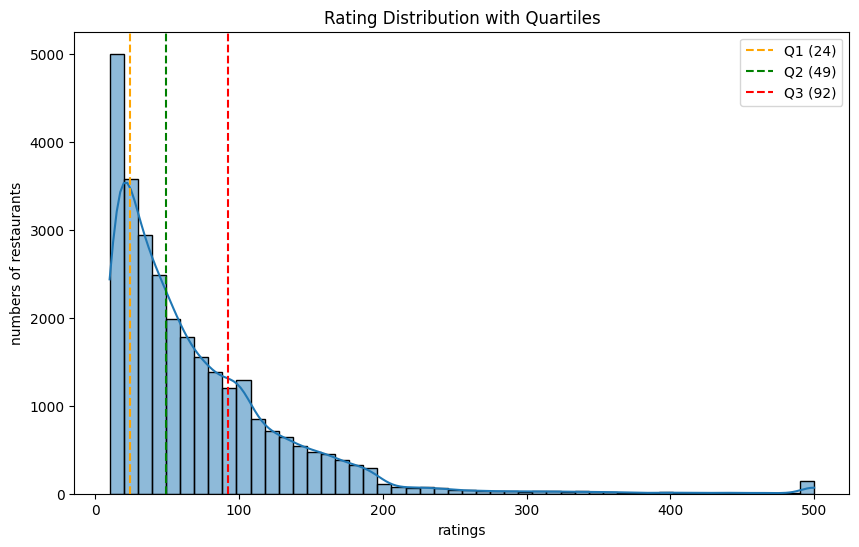

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=res_remove200, x='ratings', bins=50, kde=True)
plt.axvline(x=24, color='orange', linestyle='--', label='Q1 (24)')
plt.axvline(x=49, color='green', linestyle='--', label='Q2 (49)')
plt.axvline(x=92, color='red', linestyle='--', label='Q3 (92)')
plt.title("Rating Distribution with Quartiles")
plt.xlabel("ratings")
plt.ylabel("numbers of restaurants")
plt.legend()
plt.show()

# 決定負責&分析範圍 Determining Target Region for Responsibility and Analysis

因為實務中，身為客戶經理需要實際拜訪店家或辦公室，區域性非常重要，所以我決定先判斷各店家分布位置，選擇一個區域，並從中判斷組成，進一步決定我的負責範圍。  
In real-world practice, account managers are often required to visit restaurants or offices in person, making geographic location a crucial factor.
Therefore, I first analyzed the spatial distribution of restaurants, selected a specific region, and examined its composition to further define the scope of my assigned area.

In [13]:
mid_res = res_remove200[(res_remove200['ratings'] >= 24) & (res_remove200['ratings'] <= 92)]    #取出中型商家名單


## 製作地理分布圖 Create Geographic Distribution Map

In [14]:
mid_res_geo = mid_res.dropna(subset = ['lat', 'lng'])  #只留下帶有經緯度的資料條目

fig = px.scatter_mapbox(
    mid_res_geo,
    lat = 'lat',
    lon = 'lng',
    hover_name = 'name',
    hover_data = ['ratings', 'score', 'price_range', 'category'],
    color_discrete_sequence = ['green'],
    zoom = 3,
    height = 600
)

fig.update_layout(
    mapbox_style = 'open-street-map',
    title = 'Restaurant Location',
    margin = {"r": 0, "t": 40, "l": 0, "b": 0}
)

fig.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_18788\265825020.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


查看完分布後，我發現Uber eats的分布範圍主要聚集在美國的幾個大都市，我決定先選擇首都華盛頓  
After examining the distribution, I found that Uber Eats restaurants are primarily concentrated in several major metropolitan areas across the United States.
For this analysis, I decided to focus on Washington, D.C., the capital city.

In [15]:
mid_res['zip_code'] = pd.to_numeric(mid_res['zip_code'], errors = 'coerce')  #華盛頓州的區號介於98001 to 99403, 將原始資料中的zip code轉換為數字

mid_wa = mid_res[(mid_res['zip_code'] >= 98001) & (mid_res['zip_code'] <= 99403)] #取出郵遞區號屬於華盛頓州的店家

mid_wa['zip_code'] = mid_wa['zip_code'].astype('Int64').astype(str)  #換回字串

mid_wa.head()

C:\Users\thoma\AppData\Local\Temp\ipykernel_18788\4048479188.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thoma\AppData\Local\Temp\ipykernel_18788\4048479188.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,"Asian Fusion, Salads, Fast Food, Healthy, Fami...",$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724
7427,7428,68,Miss Moffett's Mystical Cupcakes,4.8,29.0,"Bakery, Pastry, Cupcakes",$,"8765 Tallon Ln NE Ste L, Lacey, WA, 98516",98516,47.058971,-122.753190
7431,7432,7,Cold Stone Creamery (Lacey),4.6,87.0,"Ice Cream &amp; Frozen Yogurt, Desserts",$,"1350 Marvin Rd NE, Lacey, WA, 98516",98516,47.059164,-122.764131
7440,7441,30,Papa Johns (4514 Lacey Blvd SE),4.7,55.0,"Desserts, PIzza, Wings",$$,"4514, Lacey, WA, 98503",98503,47.036680,-122.825670
7441,7442,27,Firehouse Subs (1110 Galaxy Dr NE),4.6,55.0,"Sandwich, Deli",$,"1110 Galaxy Dr NE, Lacey, WA, 98516",98516,47.056525,-122.768756


## 了解華盛頓特區數據 Exploring the Data of Washington D.C.

In [16]:
mid_wa.count()

id              2235
position        2235
name            2235
score           2235
ratings         2235
category        2235
price_range     2235
full_address    2235
zip_code        2235
lat             2235
lng             2235
dtype: int64

In [17]:
mid_wa['category'].value_counts().head(20)  #查看分類

category
American, burger, Fast Food                                                            71
American, Burgers, Fast Food                                                           51
Burgers, American, Sandwiches                                                          48
American, burger, Fast Food, Family Meals                                              41
Bakery, Breakfast and Brunch, Cafe, Coffee &amp; Tea                                   39
Cafe, Coffee &amp; Tea, Breakfast and Brunch, Bakery                                   37
Pizza, American, Italian                                                               36
Mexican, Latin American, New Mexican                                                   35
Fast Food, Sandwich, American                                                          33
Burritos, Fast Food, Mexican                                                           28
Ice Cream + Frozen Yogurt, Burgers, Chicken, American                                  27
C

### 拆分分類資料 Seperate the Categories

In [18]:
mid_wa['category_clean'] = (
    mid_wa['category']
    .str.replace('&amp;', '&', regex = False) #取代字元
    .str.lower()        #全部小寫(burgers, Burgers)
    .str.strip()       #去除頭尾空格
)

mid_wa_exploded = (
    mid_wa
    .assign(category_list = mid_wa['category_clean'].str.split(',\s*'))
    .explode('category_list')
)

mid_wa_exploded['category_list'] = mid_wa_exploded['category_list'].str.strip()


mid_wa_exploded = mid_wa_exploded.drop(['category', 'category_clean'], axis = 1)
mid_wa_exploded.head(20)

C:\Users\thoma\AppData\Local\Temp\ipykernel_18788\3489892951.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,position,name,score,ratings,price_range,full_address,zip_code,lat,lng,category_list
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724,asian fusion
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724,salads
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724,fast food
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724,healthy
7424,7425,29,MiSo - Marvin Rd,4.9,36.0,$,"2539 Marvin Rd NE, Lacey, WA, 98516",98516,47.069652,-122.772724,family meals
7427,7428,68,Miss Moffett's Mystical Cupcakes,4.8,29.0,$,"8765 Tallon Ln NE Ste L, Lacey, WA, 98516",98516,47.058971,-122.753190,bakery
7427,7428,68,Miss Moffett's Mystical Cupcakes,4.8,29.0,$,"8765 Tallon Ln NE Ste L, Lacey, WA, 98516",98516,47.058971,-122.753190,pastry
7427,7428,68,Miss Moffett's Mystical Cupcakes,4.8,29.0,$,"8765 Tallon Ln NE Ste L, Lacey, WA, 98516",98516,47.058971,-122.753190,cupcakes
7431,7432,7,Cold Stone Creamery (Lacey),4.6,87.0,$,"1350 Marvin Rd NE, Lacey, WA, 98516",98516,47.059164,-122.764131,ice cream & frozen yogurt
7431,7432,7,Cold Stone Creamery (Lacey),4.6,87.0,$,"1350 Marvin Rd NE, Lacey, WA, 98516",98516,47.059164,-122.764131,desserts


再次查看各分類存在數量 Reviewing the Number of Entries in Each Category

In [19]:
mid_wa_exploded['category_list'].value_counts().head(20)

category_list
american                889
fast food               392
asian                   321
burgers                 313
family meals            289
healthy                 264
family friendly         236
breakfast and brunch    230
desserts                226
pizza                   220
sandwich                209
mexican                 206
japanese                169
wings                   158
vegetarian friendly     156
comfort food            155
salads                  141
chinese                 141
sandwiches              138
burger                  135
Name: count, dtype: int64

In [20]:
mid_wa['price_range'].value_counts()  #查看價錢分布     

price_range
$       1636
$$       587
$$$       10
$$$$       2
Name: count, dtype: int64

In [21]:
mid_wa['score'].value_counts().head(20)   #查看評價分布

score
4.8    430
4.7    396
4.6    355
4.5    267
4.9    222
4.4    211
4.3    113
4.2     89
4.1     42
5.0     35
4.0     26
3.9     15
3.8     10
3.7      9
3.6      4
3.5      3
3.4      3
2.7      2
2.9      1
3.3      1
Name: count, dtype: int64

我認為評價是一個顯著影響顧客是否願意下單，提供餐廳機會的重要指標，尤其是Uber Eats平台上舉辦評價相關活動的難度較高，所以可信度也高。
如果身為一個客戶經理，我會想先確認這些評分位於3.9~3.7之間的店家狀況，如果能提升到4，我相信能顯著提升顧客下單率。  
I believe that ratings are a key factor influencing whether customers are willing to place an order, and they serve as an important indicator of a restaurant’s opportunity for growth.
On the Uber Eats platform, it is relatively difficult for restaurants to actively manipulate or boost their ratings through promotional events, which makes the rating data more credible.
If I were an account manager, I would first review the status of restaurants with ratings between 3.7 and 3.9. If these restaurants can improve their ratings to 4.0 or higher, I believe it could significantly increase their order conversion rate.

In [22]:
#score轉換成數字
mid_wa_exploded['score'] = pd.to_numeric(mid_wa_exploded['score'], errors='coerce')

# 篩選出score在3.7到3.9之間的資料
mid_wa_3 = mid_wa_exploded[(mid_wa_exploded['score'] >= 3.7) & (mid_wa_exploded['score'] <= 3.9)]

mid_wa_3['category_list'].value_counts()


category_list
american                     23
chicken                      16
burgers                      12
desserts                      7
wings                         7
fast food                     6
family meals                  5
comfort food                  3
burger                        3
indian                        2
bbq                           2
fried chicken                 2
vegetarian                    2
family friendly               2
chinese                       2
asian                         2
grocery                       1
everyday essentials           1
pizza                         1
snacks                        1
home & personal care          1
convenience                   1
seafood                       1
noodles                       1
vegetarian friendly           1
congee                        1
coffee and tea                1
healthy                       1
japanese                      1
sushi                         1
salads                    

看完資料後 我決定以評分介於3.7~3.9的美式餐廳作為我的負責對象，初步目標是能夠將他們的評價拉抬至4分或以上  
After analyzing the dataset, I decided to focus on American-style restaurants with ratings between 3.7 and 3.9.
My initial goal is to help them improve their ratings to 4.0 or above.

# 取出目標資料集 Extracting the Target Dataset

In [23]:
target_wa = mid_wa_3[mid_wa_3['category_list'] == 'american']
target_wa

,id,position,name,score,ratings,price_range,full_address,zip_code,lat,lng,category_list
7549,7550,87,7-Eleven (2425 Marvin Rd NE),3.9,27.0,$,"2425 Marvin Rd NE, Lacey, WA, 98516",98516,47.068050,-122.770480,american
8192,8193,36,MrBeast Burger (18410 33Rd Ave West),3.9,61.0,$$,"18410 33Rd Ave West, Lynnwood, WA, 98036",98036,47.831570,-122.277880,american
8654,8655,17,Another Wing by DJ Khaled (SEA12-1),3.7,35.0,$,"825 Northeast Northgate Way, Seattle, WA, 98125",98125,47.708420,-122.319330,american
9521,9522,5,MrBeast Burger (18029 Garden Way Ne),3.7,43.0,$$,"18029 Garden Way Ne, Woodinville, WA, 98072",98072,47.757710,-122.155590,american
9657,9658,97,MrBeast Burger (7597 170th Avenue Northeast),3.9,54.0,$$,"7597 170th Avenue Northeast, Redmond, WA, 98052",98052,47.670170,-122.114320,american
9777,9778,32,Sonic (7210 Burden Boulevard),3.9,26.0,$$,"7210 Burden Boulevard, Pasco, WA, 99301",99301,46.270264,-119.185971,american
10864,10865,10,Rebel Wings (SEA07-1),3.8,43.0,$,"8507 14th Ave S, Seattle, WA, 98108",98108,47.526970,-122.315290,american
10870,10871,4,Another Wing By Dj Khaled (SEA07-1),3.9,53.0,$,"8507 14th Ave S, Seattle, WA, 98108",98108,47.526970,-122.315290,american
10872,10873,2,Popeyes (1520 SW 100th Street),3.9,44.0,$,"1520 SW 100th Street, Seattle, WA, 98106",98106,47.514021,-122.354365,american
12417,12418,38,Wing SZN - Lakewood,3.7,61.0,$,"9815 Gravelly Lake Dr SW, Lakewood, WA, 98499",98499,47.167750,-122.520000,american


階段一找出目標商家結束 後續分析待續